In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import scipy.stats as stats


%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor


<Figure size 720x540 with 0 Axes>

In [3]:
from sklearn.utils import resample

In [4]:
back = pd.read_csv('Data_of_Attack_Back.csv')
back_bufferoverflow = pd.read_csv('Data_of_Attack_Back_BufferOverflow.csv')
ftp_write = pd.read_csv('Data_of_Attack_Back_FTPWrite.csv')
guess_password = pd.read_csv('Data_of_Attack_Back_GuessPassword.csv')
neptune = pd.read_csv('Data_of_Attack_Back_Neptune.csv')
nmap = pd.read_csv('Data_of_Attack_Back_NMap.csv')
normal = pd.read_csv('Data_of_Attack_Back_Normal.csv')
portsweep= pd.read_csv('Data_of_Attack_Back_PortSweep.csv')
rootkit = pd.read_csv('Data_of_Attack_Back_RootKit.csv')
satan = pd.read_csv('Data_of_Attack_Back_Satan.csv')
smurf = pd.read_csv('Data_of_Attack_Back_Smurf.csv')

In [5]:
back.columns

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate'],
      dtype='object')

In [6]:
ftp_write.columns = ['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate']

In [7]:
attack = pd.concat([back,back_bufferoverflow,ftp_write,guess_password,neptune,nmap,portsweep,rootkit,satan,smurf])

In [8]:
attack['attack'] = 1

In [9]:
attack

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.001,0.100,0.000,0.100,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.002,0.100,0.000,0.050,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.003,0.100,0.000,0.033,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.004,0.100,0.000,0.025,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.005,0.100,0.000,0.020,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.251,0.098,0.001,0.098,0.0,0.0,0.0,0.0,0.0,1
3003,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.252,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,1
3004,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.253,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,1
3005,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.254,0.100,0.001,0.100,0.0,0.0,0.0,0.0,0.0,1


In [10]:
normal['attack'] = 0

In [11]:
normal

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.0,0.0,0.0,0.0,0.00215,0.45076,0,0,0.0,0.0,...,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.00162,0.04528,0,0,0.0,0.0,...,0.001,0.1,0.0,0.100,0.000,0.0,0.000,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.00236,0.01228,0,0,0.0,0.0,...,0.002,0.1,0.0,0.050,0.000,0.0,0.000,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.00233,0.02032,0,0,0.0,0.0,...,0.003,0.1,0.0,0.033,0.000,0.0,0.000,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.00239,0.00486,0,0,0.0,0.0,...,0.004,0.1,0.0,0.025,0.000,0.0,0.000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576705,0.0,0.0,0.0,0.0,0.00206,0.59778,0,0,0.0,0.0,...,0.230,0.1,0.0,0.033,0.008,0.0,0.001,0.0,0.0,0
576706,0.0,0.0,0.0,0.0,0.00213,0.00660,0,0,0.0,0.0,...,0.230,0.1,0.0,0.025,0.008,0.0,0.001,0.0,0.0,0
576707,0.0,0.0,0.0,0.0,0.00163,0.04634,0,0,0.0,0.0,...,0.230,0.1,0.0,0.020,0.008,0.0,0.001,0.0,0.0,0
576708,0.0,0.0,0.0,0.0,0.00212,0.00850,0,0,0.0,0.0,...,0.230,0.1,0.0,0.017,0.008,0.0,0.001,0.0,0.0,0


In [12]:
##Undersampling
resampl = resample(normal, replace = True, n_samples = len(attack), random_state = 27).reset_index(drop = True)

In [13]:
resampl

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.0000,0.0,0.00,0.00,0.00176,0.00000,0,0,0.0,0.0,...,0.255,0.100,0.000,0.017,0.011,0.0,0.0,0.083,0.075,0
1,0.0000,0.0,0.00,0.00,0.00237,0.05741,0,0,0.0,0.0,...,0.255,0.100,0.000,0.100,0.003,0.0,0.0,0.000,0.000,0
2,0.0000,0.0,0.00,0.00,0.00310,0.00382,0,0,0.0,0.0,...,0.255,0.100,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0
3,0.0000,0.0,0.00,0.00,0.00192,0.02865,0,0,0.0,0.0,...,0.255,0.100,0.000,0.001,0.001,0.0,0.0,0.000,0.000,0
4,0.0000,0.0,0.00,0.05,0.00000,0.00000,0,0,0.0,0.0,...,0.255,0.100,0.000,0.100,0.008,0.0,0.0,0.100,0.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240835,0.0000,0.0,0.00,0.00,0.00225,0.00471,0,0,0.0,0.0,...,0.255,0.100,0.000,0.001,0.002,0.0,0.0,0.000,0.000,0
240836,0.0000,0.0,0.00,0.00,0.00333,0.08825,0,0,0.0,0.0,...,0.255,0.100,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0
240837,0.0000,0.0,0.00,0.00,0.00388,0.11360,0,0,0.0,0.0,...,0.255,0.100,0.000,0.003,0.002,0.0,0.0,0.000,0.000,0
240838,0.0004,0.0,0.01,0.00,0.00979,0.00331,0,0,0.0,0.0,...,0.165,0.082,0.002,0.000,0.000,0.0,0.0,0.000,0.000,0


In [14]:
final = pd.concat([resampl,attack])

In [15]:
final = final.reset_index(drop =True)

In [16]:
final.attack.value_counts()

1    240840
0    240840
Name: attack, dtype: int64

In [17]:
final

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.0,0.00,0.00,0.00,0.00176,0.00000,0,0.0,0.0,0.0,...,0.255,0.100,0.000,0.017,0.011,0.0,0.0,0.083,0.075,0
1,0.0,0.00,0.00,0.00,0.00237,0.05741,0,0.0,0.0,0.0,...,0.255,0.100,0.000,0.100,0.003,0.0,0.0,0.000,0.000,0
2,0.0,0.00,0.00,0.00,0.00310,0.00382,0,0.0,0.0,0.0,...,0.255,0.100,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0
3,0.0,0.00,0.00,0.00,0.00192,0.02865,0,0.0,0.0,0.0,...,0.255,0.100,0.000,0.001,0.001,0.0,0.0,0.000,0.000,0
4,0.0,0.00,0.00,0.05,0.00000,0.00000,0,0.0,0.0,0.0,...,0.255,0.100,0.000,0.100,0.008,0.0,0.0,0.100,0.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481675,0.0,0.02,0.09,0.00,0.01032,0.00000,0,0.0,0.0,0.0,...,0.251,0.098,0.001,0.098,0.000,0.0,0.0,0.000,0.000,1
481676,0.0,0.02,0.09,0.00,0.01032,0.00000,0,0.0,0.0,0.0,...,0.252,0.099,0.001,0.099,0.000,0.0,0.0,0.000,0.000,1
481677,0.0,0.02,0.09,0.00,0.01032,0.00000,0,0.0,0.0,0.0,...,0.253,0.099,0.001,0.099,0.000,0.0,0.0,0.000,0.000,1
481678,0.0,0.02,0.09,0.00,0.01032,0.00000,0,0.0,0.0,0.0,...,0.254,0.100,0.001,0.100,0.000,0.0,0.0,0.000,0.000,1


In [18]:
#type conversion
final[' protocol_type'] = final[' protocol_type'].astype(str)
final[' service'] = final[' service'].astype(str)
final[' flag'] = final[' flag'].astype(str)

In [19]:
#Separating numerical and categorical variables
numeric_var_names=[key for key in dict(final.dtypes) if dict(final.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(final.dtypes) if dict(final.dtypes)[key] in ['object']]

In [20]:
df_num = final[numeric_var_names]
df_cat = final[cat_var_names]

In [21]:
df_y = df_num['attack'].reset_index(drop = True)

In [22]:
del df_num['attack']

In [23]:
#Missing vlaue treatment for numerical variable
def missings_treat(x):
    x = x.fillna(x.median())
    return x


In [24]:
df_num= df_num.apply(lambda x: missings_treat(x))

In [25]:
#Missing value treatment for categorical variable
def missings_treat(y):
    y = y.fillna(y.mode()[0])
    return y

In [26]:
df_cat= df_cat.apply(lambda y: missings_treat(y))

In [27]:
df_num.isnull().sum()

duration                        0
 src_bytes                      0
 dst_bytes                      0
 land                           0
 wrong_fragment                 0
 urgent                         0
 hot                            0
 num_failed_logins              0
 logged_in                      0
 num_compromised                0
 root_shell                     0
 su_attempted                   0
 num_root                       0
 num_file_creations             0
 num_shells                     0
 num_access_files               0
 num_outbound_cmds              0
 is_host_login                  0
 is_guest_login                 0
 count                          0
 srv_count                      0
 serror_rate                    0
 srv_error_rate                 0
 rerror_rate                    0
 srv_rerror_rate                0
 same_srv_rate                  0
 diff_srv_rate                  0
 srv_diff_host_rate             0
 dst_host_count                 0
 dst_host_srv_

In [28]:
df_cat.isnull().sum()

 protocol_type    0
 service          0
 flag             0
dtype: int64

<AxesSubplot:>

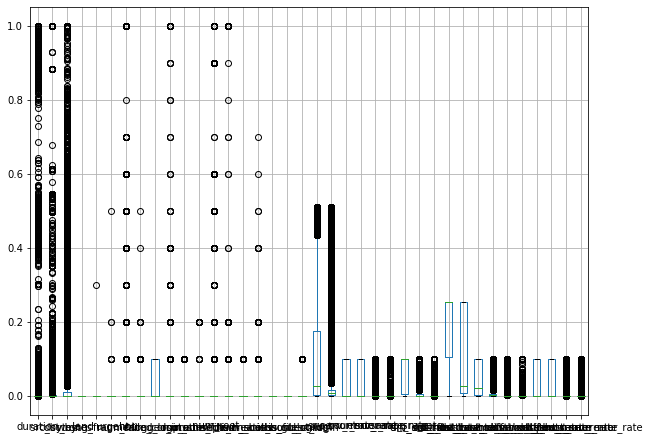

In [29]:
#Handling Outliers
df_num.plot(kind = 'box')

In [30]:
def outlier_capping(x):
    x = x.clip(upper = x.quantile(0.95))
    x = x.clip(lower = x.quantile(0.05))
    return x

In [31]:
df_num= df_num.apply(lambda x: outlier_capping(x))

### Encoding 

In [32]:
## Dummy variable creation for nominal variables
df_cat = pd.get_dummies(df_cat, drop_first=True).reset_index(drop = True)

In [33]:
df_treated = pd.concat([df_cat,df_num,df_y],axis=1).reset_index(drop = True)

In [34]:
df_treated

,protocol_type_0.01,protocol_type_0.02,service_0.01,service_0.02,service_0.03,service_0.04,service_0.05,service_0.06,service_0.07,service_0.08,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,0,0,0,0,0,0,0,0,0,...,0.255,0.100,0.000,0.017,0.005,0.0,0.0,0.083,0.075,0
1,0,0,0,0,0,0,0,0,0,0,...,0.255,0.100,0.000,0.033,0.003,0.0,0.0,0.000,0.000,0
2,0,0,0,0,0,0,0,0,0,0,...,0.255,0.100,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0
3,0,0,0,0,0,0,0,0,0,0,...,0.255,0.100,0.000,0.001,0.001,0.0,0.0,0.000,0.000,0
4,0,0,0,0,0,0,0,0,0,0,...,0.255,0.100,0.000,0.033,0.005,0.0,0.0,0.100,0.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481675,0,1,0,0,0,0,0,0,0,0,...,0.251,0.098,0.001,0.033,0.000,0.0,0.0,0.000,0.000,1
481676,0,1,0,0,0,0,0,0,0,0,...,0.252,0.099,0.001,0.033,0.000,0.0,0.0,0.000,0.000,1
481677,0,1,0,0,0,0,0,0,0,0,...,0.253,0.099,0.001,0.033,0.000,0.0,0.0,0.000,0.000,1
481678,0,1,0,0,0,0,0,0,0,0,...,0.254,0.100,0.001,0.033,0.000,0.0,0.0,0.000,0.000,1


### Variable reduction 

In [35]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
X = df_treated[df_treated.columns.difference(['attack'])]
y = df_treated[['attack']]

rfe = RFE(RandomForestClassifier(), 25)
rfe = rfe.fit(X, y)

X.columns[rfe.get_support()]

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=25 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Index([' count', ' diff_srv_rate', ' dst_bytes', ' dst_host_count',
       ' dst_host_diff_srv_rate', ' dst_host_rerror_rate',
       ' dst_host_same_src_port_rate', ' dst_host_same_srv_rate',
       ' dst_host_serror_rate', ' dst_host_srv_count',
       ' dst_host_srv_diff_host_rate', ' dst_host_srv_rerror_rate',
       ' dst_host_srv_serror_rate', ' flag_0.08', ' logged_in',
       ' protocol_type_0.02', ' same_srv_rate', ' serror_rate',
       ' service_0.06', ' service_0.09', ' service_0.12', ' src_bytes',
       ' srv_count', ' srv_error_rate', ' srv_rerror_rate'],
      dtype='object')

In [36]:
#SelectKbest
from sklearn.f eature_selection import SelectKBest, f_classif
SKB = SelectKBest(f_classif, k=25).fit(X, y )

X.columns[SKB.get_support()]

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 23  24  25  26  28  29  30  31  32  33  34  38 112 113 114 115] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Index([' count', ' diff_srv_rate', ' dst_bytes', ' dst_host_count',
       ' dst_host_diff_srv_rate', ' dst_host_rerror_rate',
       ' dst_host_same_src_port_rate', ' dst_host_same_srv_rate',
       ' dst_host_serror_rate', ' dst_host_srv_count',
       ' dst_host_srv_diff_host_rate', ' dst_host_srv_rerror_rate',
       ' dst_host_srv_serror_rate', ' flag_0.05', ' flag_0.07', ' logged_in',
       ' rerror_rate', ' same_srv_rate', ' serror_rate', ' service_0.01',
       ' service_0.12', ' src_bytes', ' srv_diff_host_rate', ' srv_error_rate',
       ' srv_rerror_rate'],
      dtype='object')

In [37]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
VIF = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [40]:
VIF = pd.Series(VIF, name='VIF')

In [41]:
cols = pd.Series(X.columns, name='Column_Name')

In [42]:
VIF_res = pd.concat([cols,VIF],axis=1)

In [45]:
VIF_10 = VIF_res.sort_values(by=['VIF'], ascending = False).head(20)

In [46]:
VIF_10

,Column_Name,VIF
36,protocol_type_0.02,inf
46,service_0.06,inf
49,service_0.09,inf
102,service_0.62,inf
51,service_0.11,inf
19,flag_0.07,1950.044127
110,srv_error_rate,1758.951610
12,dst_host_srv_serror_rate,1607.024043
40,serror_rate,1361.939145
8,dst_host_serror_rate,713.937205


### Final list 

In [35]:
final_imp_features = {' count', ' diff_srv_rate', ' dst_bytes', ' dst_host_count',
       ' dst_host_diff_srv_rate', ' dst_host_rerror_rate',
       ' dst_host_same_src_port_rate', ' dst_host_same_srv_rate',
       ' dst_host_serror_rate', ' dst_host_srv_count',
       ' dst_host_srv_diff_host_rate', ' dst_host_srv_rerror_rate',
       ' dst_host_srv_serror_rate',' rerror_rate', ' flag_0.08',' flag_0.05', ' logged_in', ' same_srv_rate', ' serror_rate',
        ' service_0.09',' service_0.01', ' service_0.12', ' src_bytes',
       ' srv_count',' srv_diff_host_rate', ' srv_error_rate', ' srv_rerror_rate'}

In [36]:
imp_features = list(final_imp_features)

In [37]:
df_final_X = df_treated[imp_features]

In [38]:
df_final_X.head()

,logged_in,service_0.09,rerror_rate,srv_count,dst_host_srv_rerror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,service_0.12,dst_host_same_src_port_rate,dst_bytes,...,diff_srv_rate,count,service_0.01,dst_host_rerror_rate,dst_host_count,dst_host_srv_count,srv_rerror_rate,flag_0.08,flag_0.05,serror_rate
0,0.1,0,0.0,0.001,0.075,0.0,0.0,0,0.017,0.00000,...,0.0,0.001,0,0.083,0.008,0.255,0.0,0,0,0.0
1,0.1,0,0.0,0.001,0.000,0.0,0.0,0,0.033,0.05741,...,0.0,0.001,0,0.000,0.008,0.255,0.0,0,0,0.0
2,0.1,0,0.0,0.009,0.000,0.0,0.0,0,0.000,0.00382,...,0.0,0.009,0,0.000,0.255,0.255,0.0,0,0,0.0
3,0.1,0,0.0,0.007,0.000,0.0,0.0,0,0.001,0.02865,...,0.0,0.007,0,0.000,0.191,0.255,0.0,0,0,0.0
4,0.0,0,0.1,0.001,0.100,0.0,0.0,0,0.033,0.00000,...,0.0,0.001,0,0.100,0.008,0.255,0.1,0,1,0.0


In [39]:
df_final_Y = df_treated.loc[:,['attack']]

In [40]:
df_final = pd.concat([df_final_X,df_final_Y],axis=1)

In [41]:
df_final

,logged_in,service_0.09,rerror_rate,srv_count,dst_host_srv_rerror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,service_0.12,dst_host_same_src_port_rate,dst_bytes,...,count,service_0.01,dst_host_rerror_rate,dst_host_count,dst_host_srv_count,srv_rerror_rate,flag_0.08,flag_0.05,serror_rate,attack
0,0.1,0,0.0,0.001,0.075,0.0,0.0,0,0.017,0.00000,...,0.001,0,0.083,0.008,0.255,0.0,0,0,0.0,0
1,0.1,0,0.0,0.001,0.000,0.0,0.0,0,0.033,0.05741,...,0.001,0,0.000,0.008,0.255,0.0,0,0,0.0,0
2,0.1,0,0.0,0.009,0.000,0.0,0.0,0,0.000,0.00382,...,0.009,0,0.000,0.255,0.255,0.0,0,0,0.0,0
3,0.1,0,0.0,0.007,0.000,0.0,0.0,0,0.001,0.02865,...,0.007,0,0.000,0.191,0.255,0.0,0,0,0.0,0
4,0.0,0,0.1,0.001,0.100,0.0,0.0,0,0.033,0.00000,...,0.001,0,0.100,0.008,0.255,0.1,0,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481675,0.0,1,0.0,0.032,0.000,0.0,0.0,0,0.033,0.00000,...,0.251,0,0.000,0.255,0.251,0.0,0,0,0.0,1
481676,0.0,1,0.0,0.032,0.000,0.0,0.0,0,0.033,0.00000,...,0.252,0,0.000,0.255,0.252,0.0,0,0,0.0,1
481677,0.0,1,0.0,0.032,0.000,0.0,0.0,0,0.033,0.00000,...,0.253,0,0.000,0.255,0.253,0.0,0,0,0.0,1
481678,0.0,1,0.0,0.032,0.000,0.0,0.0,0,0.033,0.00000,...,0.254,0,0.000,0.255,0.254,0.0,0,0,0.0,1


### Split data into train and test 

In [42]:
train, test = train_test_split(df_final, test_size=0.3, random_state=123)

In [43]:
x_train = train[train.columns.difference(['attack'])]

In [44]:
y_train = train['attack']

In [45]:
x_test = test[test.columns.difference(['attack'])]

In [46]:
y_test = test['attack']

In [47]:
train.shape

(337176, 28)

In [48]:
test.shape

(144504, 28)

## Logistic Regression 

In [49]:
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression().fit(x_train,y_train)

In [56]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

#### AUC Score 

In [57]:
## Calculating AUC for train 
train_auc = metrics.roc_auc_score(train.attack, train_pred)
train_auc

0.9948546649777791

In [58]:
## Calculating AUC for test
test_auc = metrics.roc_auc_score(test.attack, test_pred)
test_auc

0.9945107687490313

#### Sommer's D  

In [61]:
## For Train
train_sommer = 2*train_auc-1
train_sommer

0.9897093299555582

In [63]:
##For Test
test_sommer = 2*test_auc-1
test_sommer

0.9890215374980627

## KNN Classifier

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [71]:
param_grid = {'n_neighbors' : [3,5,7,9,11], 'weights': ['uniform', 'distance']}

In [72]:
model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1_weighted')
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [73]:
model.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [74]:
model.best_score_

0.9994305644334742

In [75]:
best_model = KNeighborsClassifier(n_neighbors=3, weights='distance')
best_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [78]:
#Train data - AUC Score
metrics.roc_auc_score(y_train, pd.DataFrame(best_model.predict(x_train)))

1.0

In [85]:
#Test data - AUC Score
metrics.roc_auc_score(y_test, pd.DataFrame(best_model.predict(x_test)))

0.9995639255476592

## Desicion Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
param_grid = {'max_depth': [3,4,5,6,7,8,9,10],
              'max_leaf_nodes': [5,6,7,8,9,10,11,12]
}
model = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1_weighted')
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11, 12]},
             scoring='f1_weighted')

In [88]:
model.best_params_

{'max_depth': 8, 'max_leaf_nodes': 12}

In [89]:
best_model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=12)
best_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=12)

In [91]:
## Train AUC Score
print(metrics.roc_auc_score(y_train, pd.DataFrame(best_model.predict(x_train))))

0.9972823852425756


In [92]:
## Test AUC Score
print(metrics.roc_auc_score(y_test, pd.DataFrame(best_model.predict(x_test))))

0.9971508062135602
